**Question **1****

Two matrices of order (n,k) and (k,m) are given.

Let A be a matrix of order (n,k)
Let B be a matrix of order (k,m)

Let the resulting matrix be C of order (n,m)

Each element of matrix C, let it be Cij

$$
C_{ij} = \sum_{l=1}^{k} A_{il} \cdot B_{lj}
$$

For each of the nxm elements in the resulting matrix C, we perform **k** multiplications.
So, Total multiplications are **nxmxk**.

Similarly, to sum up k products for each element of the resulting matrix, we need **k-1** multiplications.
So, Total additions are **nxmxk-1**.

**Question 2**

In [21]:
import time
import numpy as np
import random

n, m, k = 100, 150, 80

# Random Matrices
A = [[random.random() for _ in range(m)] for _ in range(n)]
B = [[random.random() for _ in range(k)] for _ in range(m)]

# Method 1: List of Lists

start1 = time.time()

C1 = [[0 for _ in range(k)] for _ in range(n)]
for i in range(n):
    for j in range(k):
        for p in range(m):
            C1[i][j] += A[i][p] * B[p][j]

end1 = time.time()
time_list = end1 - start1

# Method 2: NumPy

A_np = np.array(A)
B_np = np.array(B)

start2 = time.time()
C2 = np.dot(A_np, B_np)
end2 = time.time()
time_np = end2 - start2

# Results

print(f"Time using list of lists: {time_list:.6f} seconds")
print(f"Time using NumPy:         {time_np:.6f} seconds")



Time using list of lists: 0.677907 seconds
Time using NumPy:         0.000702 seconds


NumPy is faster because it’s written in low-level C language, not plain Python.
It uses optimized libraries like BLAS and LAPACK for fast matrix operations.
Unlike Python lists, NumPy avoids slow loops and works with entire arrays at once.
Its operations are vectorized, which means they run without Python-level for-loops.
It stores data in a compact, contiguous memory layout for faster access.
That’s why NumPy can do the same work hundreds of times faster than Python lists.

**Question 3**

In [51]:
import random
import time
import numpy as np

n = 101  
data = [random.randint(1, 1000) for _ in range(n)]

# Method 1 - Max-removal method
def median_max_removal(lst):
    temp = lst[:]
    for _ in range(len(temp)//2):
        temp.remove(max(temp))
    return max(temp)

# Method 2 - Sorting method
def median_sort(lst):
    sorted_list = sorted(lst)
    return sorted_list[len(sorted_list)//2]

# Method 3 - NumPy method
def median_numpy(lst):
    return np.median(lst)

# Comparing times
start = time.time()
print("Max-removal median:", median_max_removal(data), "| Time:", round(time.time() - start, 5), "s")

start = time.time()
print("Sorted median     :", median_sort(data), "| Time:", round(time.time() - start, 5), "s")

start = time.time()
print("NumPy median       :", median_numpy(data), "| Time:", round(time.time() - start, 5), "s")


Max-removal median: 491 | Time: 0.00027 s
Sorted median     : 491 | Time: 0.0002 s
NumPy median       : 491.0 | Time: 0.00063 s


**1. Max-Removal Method**

* Repeatedly finds and removes the largest number.

* After removing the top half, the next biggest value is the median.

Example:
If the list is [3,9,1,4,7]
→ Remove 9 → Remove 7 → Remaining = [3, 1, 4] → Median is the largest = 4

Why it's slow:

* Each max() takes time.

* Repeating this many times makes it very slow, especially for big lists.

**Time complexity: O(n²)**

**2. Sorting Method**

* Sort the list once.

* If odd, pick the middle value.

* If even, take the average of the two middle values.

Why it's better:

* Sorting is fast using efficient algorithms 

* Much faster than removing max repeatedly.

**Time complexity: O(n log n)**

**3. NumPy Method**

* Uses optimized C/Fortran libraries under the hood.

* Handles large arrays very quickly.

* You just call np.median().

Why is it fastest:

* Written in low-level fast languages

* Avoids slow Python loops

* Ideal for large datasets

**Time complexity:**

Internally optimized (often **O(n log n)** or better due to tricks like partial sorting)


**Question 4**)
**What is the gradient of the following function with respect to x and y?**

 $ x^2 y + y^3 \sin(x) $



**Sol)** Let the function be:  
$f(x, y) = x^2 y + y^3 \sin(x)$

**Partial Derivatives:**  
With respect to $x$:  
$\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)$  

With respect to $y$:  
$\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)$  

**Gradient vector:**  
$\nabla f(x, y) = \begin{bmatrix} 2xy + y^3 \cos(x) \\ x^2 + 3y^2 \sin(x) \end{bmatrix}$


**Question 5)** **Use JAX to confirm that the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [49]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def f_vec(v):
    x, y = v
    return f(x, y)

grad_f = jax.grad(f_vec)

def analytical_grad(x, y):
    df_dx = 2*x*y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3*y**2 * jnp.sin(x)
    return jnp.array([df_dx, df_dy])

test_points = [
    (1.0, 2.0),
    (0.5, -1.5),
    (jnp.pi, 1.0)
]

for x, y in test_points:
    auto_grad = grad_f(jnp.array([x, y]))
    manual_grad = analytical_grad(x, y)
    print(f"\nAt x={x:.3f}, y={y:.3f}:")
    print(f"  JAX Gradient     : {auto_grad}")
    print(f"  Manual Gradient  : {manual_grad}")
    print(f"  Difference       : {jnp.abs(auto_grad - manual_grad)}")



At x=1.000, y=2.000:
  JAX Gradient     : [ 8.322418  11.0976515]
  Manual Gradient  : [ 8.322418  11.0976515]
  Difference       : [0. 0.]

At x=0.500, y=-1.500:
  JAX Gradient     : [-4.461841   3.4861224]
  Manual Gradient  : [-4.461841   3.4861224]
  Difference       : [0. 0.]

At x=3.142, y=1.000:
  JAX Gradient     : [5.2831855 9.869605 ]
  Manual Gradient  : [5.2831855 9.869604 ]
  Difference       : [0.000000e+00 9.536743e-07]


**Question 6)** **Use sympy to confirm that you obtain the same gradient analytically.**

In [45]:
import sympy as sp

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)


∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)


**Question 7)**

In [55]:
students = {2022: {"Branch1": {1: {"Name": "Mohan","Marks": {"Maths": 100, "English": 70}}},"Branch2": {2: {"Name": "Ram","Marks": {"Maths": 90, "English": 80}}}},
    2023: {
        "Branch1": {},
        "Branch2": {}
    },
    2024: {
        "Branch1": {},
        "Branch2": {}
    },
    2025: {
        "Branch1": {},
        "Branch2": {}
    }
}

for year, branches in students.items():
    print(f"\nYear: {year}")
    for branch, records in branches.items():
        print(f"  {branch}:")
        if records:
            for roll, info in records.items():
                print(f"    Roll Number: {roll}")
                print(f"      Name: {info['Name']}")
                print(f"      Marks:")
                for subject, mark in info["Marks"].items():
                    print(f"        {subject}: {mark}")
        else:
            print("    No student records")



Year: 2022
  Branch1:
    Roll Number: 1
      Name: Mohan
      Marks:
        Maths: 100
        English: 70
  Branch2:
    Roll Number: 2
      Name: Ram
      Marks:
        Maths: 90
        English: 80

Year: 2023
  Branch1:
    No student records
  Branch2:
    No student records

Year: 2024
  Branch1:
    No student records
  Branch2:
    No student records

Year: 2025
  Branch1:
    No student records
  Branch2:
    No student records


**Question 8)** **Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**



In [59]:
class Student:
 def __init__(self,name,roll,marks):
  self.name=name
  self.roll=roll
  self.marks=marks

class Branch:
 def __init__(self,name):
  self.name=name
  self.students=[]

class Year:
 def __init__(self,year):
  self.year=year
  self.branches=[]

class Database:
 def __init__(self):
  self.years=[]

 def display(self):
  for y in self.years:
   print("Year:",y.year)
   for b in y.branches:
    print(" Branch:",b.name)
    for s in b.students:
     print(f"  Roll: {s.roll}, Name: {s.name}, Marks: {s.marks}")

db=Database()
# Obtaining data from the classes
y1=Year(2022)
b1=Branch("Branch1")
b2=Branch("Branch2")
b1.students.append(Student("Mohan",1,{"Maths":95,"English":88}))
b2.students.append(Student("Ram",2,{"Maths":78,"English":90}))
y1.branches.extend([b1,b2])

y2=Year(2023)
b3=Branch("Branch1")
b4=Branch("Branch2")
b3.students.append(Student("Harsha",3,{"Maths":85,"English":70}))
b4.students.append(Student("Dhanush",4,{"Maths":92,"English":75}))
y2.branches.extend([b3,b4])

db.years.extend([y1,y2])
db.display()


Year: 2022
 Branch: Branch1
  Roll: 1, Name: Mohan, Marks: {'Maths': 95, 'English': 88}
 Branch: Branch2
  Roll: 2, Name: Ram, Marks: {'Maths': 78, 'English': 90}
Year: 2023
 Branch: Branch1
  Roll: 3, Name: Harsha, Marks: {'Maths': 85, 'English': 70}
 Branch: Branch2
  Roll: 4, Name: Dhanush, Marks: {'Maths': 92, 'English': 75}


**Question 9)**

Matplotlib is building the font cache; this may take a moment.


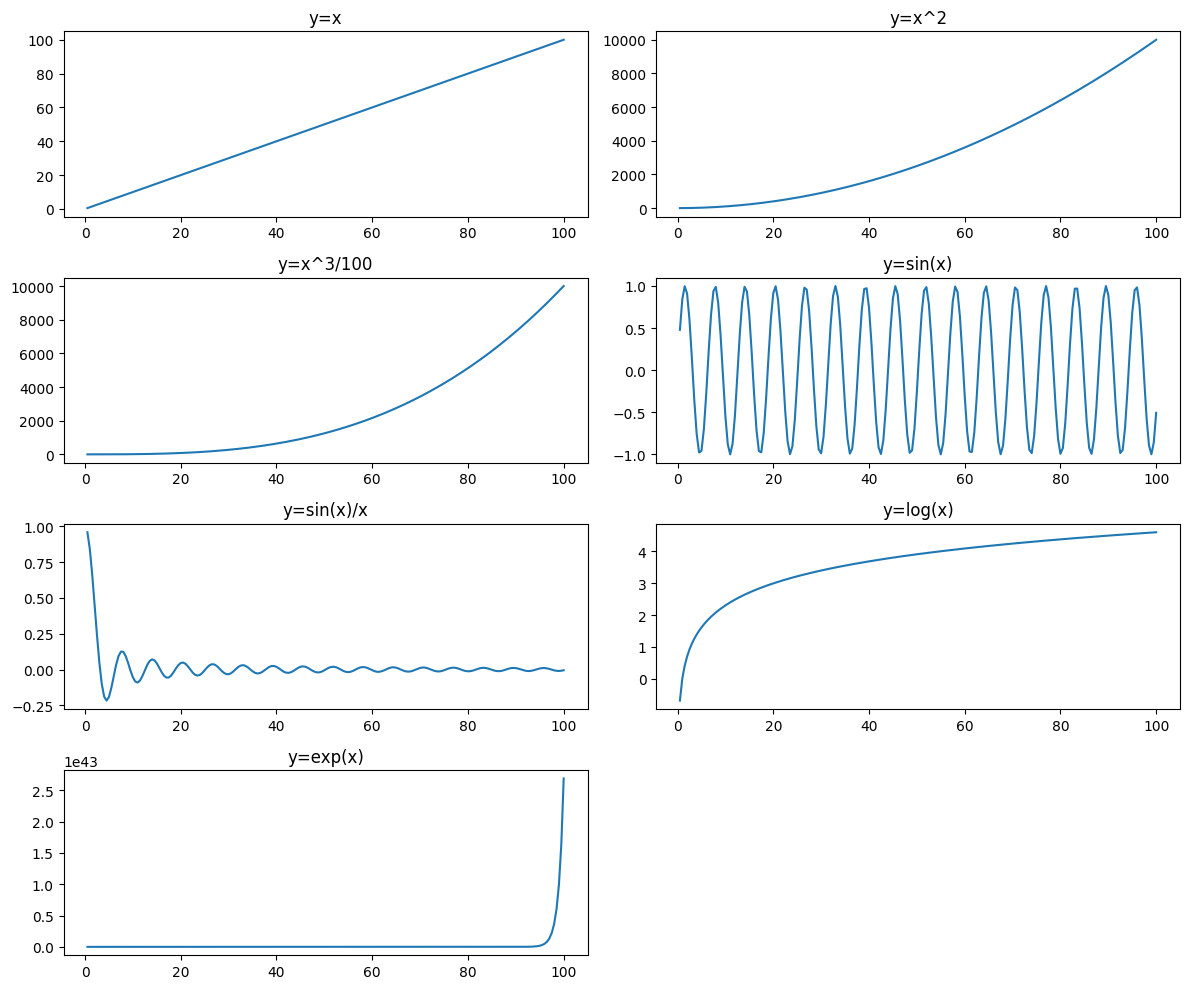

In [63]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0.5,100.5,0.5)
y1=x
y2=x**2
y3=x**3/100
y4=np.sin(x)
y5=np.sin(x)/x
y6=np.log(x)
y7=np.exp(x)
plt.figure(figsize=(12,10))
plt.subplot(4,2,1)
plt.plot(x,y1)
plt.title("y=x")
plt.subplot(4,2,2)
plt.plot(x,y2)
plt.title("y=x^2")
plt.subplot(4,2,3)
plt.plot(x,y3)
plt.title("y=x^3/100")
plt.subplot(4,2,4)
plt.plot(x,y4)
plt.title("y=sin(x)")
plt.subplot(4,2,5)
plt.plot(x,y5)
plt.title("y=sin(x)/x")
plt.subplot(4,2,6)
plt.plot(x,y6)
plt.title("y=log(x)")
plt.subplot(4,2,7)
plt.plot(x,y7)
plt.title("y=exp(x)")
plt.tight_layout()
plt.show()
